# Machine Learning

A plataforma web de aprendizagem interativa [freeCodeCamp](https://www.freecodecamp.org/) publicou o excelente curso desenvolvido pela engenheira e cientista graduada pelo MIT, [Kylie Ying](https://www.kylieying.com/), intitulado **Machine Learning for Everybody** – [Full Course](https://www.youtube.com/watch?v=i_LwzRVP7bg). 

## Classificação binária

No início do curso, foi abordado um problema de aprendizado supervisionado, para classificação binária, em que o modelo aprende com dados de treinamento devidamente rotulados, para no fim ser colocado à prova com os dados de teste, após o ajuste com dados de validação. O modelo deve classificar as partículas, a partir das características fornecidas pelas *features*, em raios gama(*sinal*) ou hadron(*fundo*). 

Foram utilizados diversos algoritmos de classificação.

### Dataset:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

O dataset *MAGIC Gamma Telescope* foi gerado com o método de simulação denominado *Monte Carlo*, utilizado para reproduzir indiretamente as características dos raios gama que teriam provocado as chuvas eletromagnéticas na atmosfera. Esse método é particularmente eficaz para modelar sistemas complexos e estocásticos, como as interações de partículas de alta energia na atmosfera, permitindo a simulação detalhada dos processos físicos envolvidos e a coleta de dados sobre as características esperadas das chuvas eletromagnéticas geradas pelos raios gama.

O artigo original que relata a simulação pode ser obtido em: https://inspirehep.net/literature/469835

## Radiação Cherenkov

Os telescópios Cherenkov são baseados no solo e os raios gama são absorvidos pela atmosfera da Terra antes de alcançarem a superfície. Esses telescópios detectam a radiação Cherenkov produzida quando os raios gama interagem com a atmosfera, criando chuvas de partículas secundárias. Esse método indireto permite estudar os raios gama de alta energia de forma segura e eficaz.

**Radiação Cherenkov**, em homenagem físico russo e soviético, Nobel de Física em 1958, *Pavel Alexeevitch Tcherenkov*, é a luz emitida quando uma partícula carregada, como um elétron, viaja através de um meio (como água ou ar) a uma velocidade superior à velocidade da luz. Este fenômeno é análogo ao *boom* sônico produzido por um objeto que viaja mais rápido que a velocidade do som no ar. A radiação Cherenkov é emitida em um ângulo característico em relação à direção da partícula, formando um cone de luz azulada, que pode ser detectado por dispositivos especializados, como telescópios Cherenkov atmosféricos, para estudar partículas de alta energia e suas interações.

Alguns dispositivos foram desenvolvidos para a observação direta dos raios gama na atmosfera e além, incluindo telescópios de raios gama espaciais, colocados em órbita acima da atmosfera terrestre, onde podem detectar diretamente os raios gama sem interferência atmosférica. Citamos alguns exemplos:

**Telescópio Espacial de Raios Gama Fermi**: Lançado pela NASA, este telescópio detecta raios gama de alta energia.

**Observatório de Raios Gama Compton**: Um observatório de raios gama que operou de 1991 a 2000.

**Balões Estratosféricos**: Equipados com detectores de raios gama, esses balões são lançados até a estratosfera, onde a densidade atmosférica é muito menor, permitindo a observação direta dos raios gama. Exemplos de missões incluem:

**Observações com Balões de Alta Altitude**: Programas de balões da NASA e outras agências espaciais que transportam detectores para altitudes onde a interferência atmosférica é mínima.

Esses instrumentos foram projetados para operar fora da influência da densa atmosfera terrestre, permitindo a detecção direta e o estudo dos raios gama provenientes de fontes cósmicas.

## Processo de modelagem padrão

Em um processo de modelagem padrão, utilizamos dados de validação para ajustar o modelo, especialmente quando estamos testando diferentes algoritmos ou ajustando hiperparâmetros. Somente após escolher o melhor modelo com base nos dados de validação é que utilizamos os dados de teste para avaliar a performance final.

Um fluxo de trabalho adequado deve garantir que os dados de validação sejam usados adequadamente para ajustar o modelo.

Ao usar os dados de validação, você pode ajustar hiperparâmetros e selecionar o melhor modelo sem contaminar os dados de teste, que devem ser usados apenas para a avaliação final. Se você estiver testando múltiplos modelos, pode repetir o processo de treinamento e validação para cada modelo, comparando seus desempenhos nos dados de validação para decidir qual modelo será avaliado nos dados de teste.


De outra sorte, para que subdividir o dataset em *treinamento*, *validação* e *teste*?

## Importamos as bilbiotecas

In [60]:
                                                                                import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB

## Carregamos o dataset
### Renomeamos as colunas

In [61]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Transformamos a variável categórica em numérica

In [62]:
df["class"] = (df["class"] == "g").astype(int)

In [63]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


## Visualizamos as distribuições 

**Criamos uma matriz de gráficos de dispersão:**

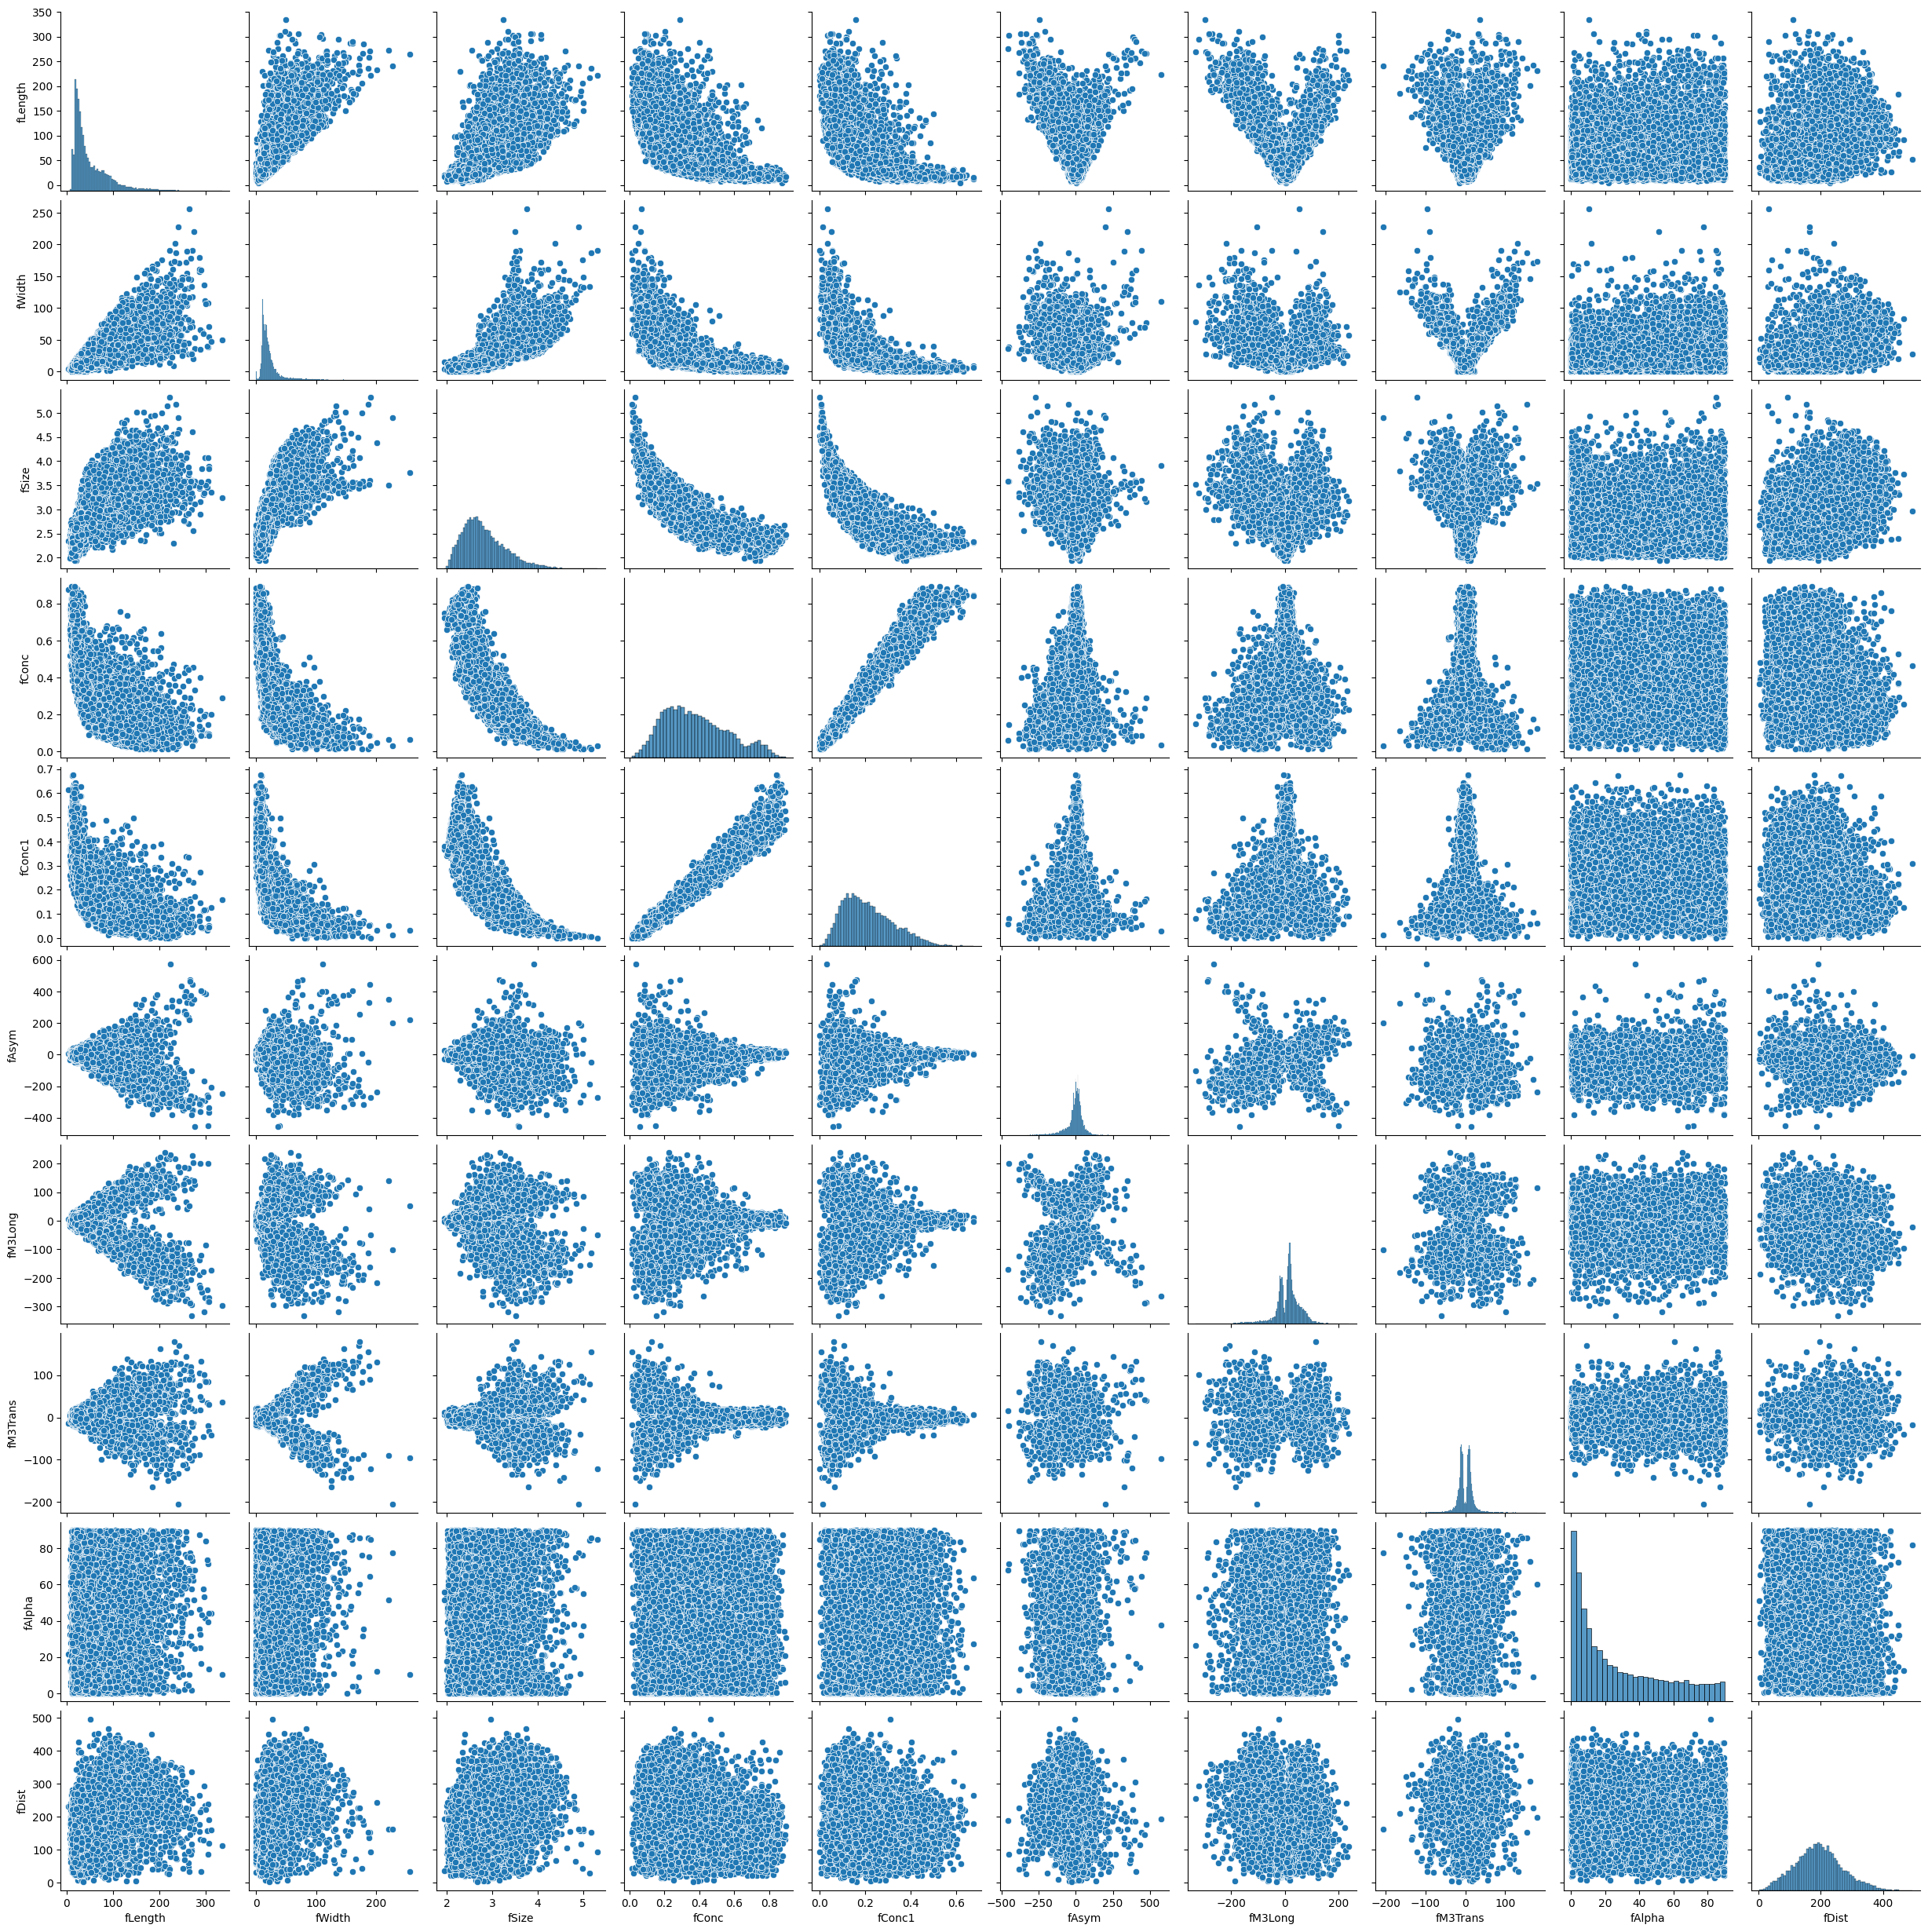

In [93]:
import seaborn as sns
dados = df.iloc[:, :-1].copy()
sns.pairplot(data=dados)

**Calculamos a matriz de correlação:**

<Axes: >

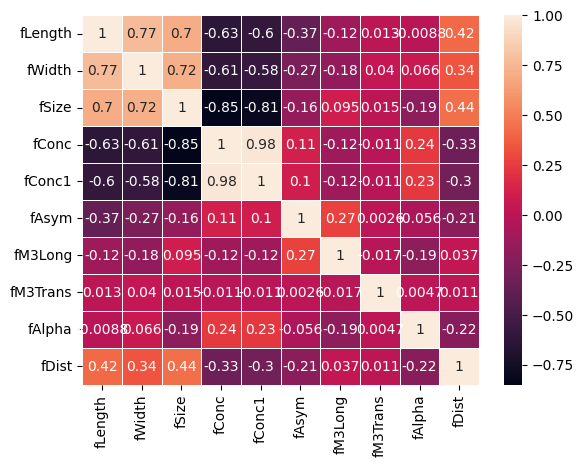

In [88]:
corr = df.drop(labels='class',axis=1).corr()
sns.heatmap(data=corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=0.5,annot=True)

### Separação do dataset em treinamento, validação e teste

In [65]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

### Conferimos o balanceamento dos dados

In [66]:
print(len(train[train["class"]==1]))

7416


In [67]:
print(len(train[train["class"]==0]))

3996


## Padronização e balanceamento dos dados

Além da padronização dos dados, utilizamos o método *RandomOverSampler* para reamostragem dos dados desbalanceados.

In [68]:
    def scale_dataset(dataframe, oversample=False):
      X = dataframe[dataframe.columns[:-1]].values
      y = dataframe[dataframe.columns[-1]].values
    
      scaler = StandardScaler()
      X = scaler.fit_transform(X)
    
      if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
      data = np.hstack((X, np.reshape(y, (-1, 1))))
    
      return data, X, y

In [69]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

## KNN

O KNN é um algoritmo de aprendizado supervisionado que classifica uma nova amostra com base na maioria dos "vizinhos" mais próximos. Neste caso, utilizamos `k=5`, o que significa que a classificação de uma nova amostra será baseada nas 5 amostras mais próximas no espaço dos recursos.


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [71]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
y_valid_pred = knn_model.predict(X_valid)

In [73]:
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1387
           1       0.85      0.86      0.86      2417

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.82      0.82      3804



# Naive Bayes

O Naive Bayes é baseado no teorema de Bayes, que assume independência entre os predictores. Este modelo é útil para problemas de classificação binária e multiclasse.


In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [76]:
y_valid_pred = nb_model.predict(X_valid)
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      1387
           1       0.72      0.90      0.80      2417

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.69      3804



In [77]:
# Log Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [80]:
y_valid_pred = lg_model.predict(X_valid)
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1387
           1       0.83      0.82      0.83      2417

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.78      0.78      0.78      3804



# SVM

O SVM é um algoritmo que encontra um hiperplano que melhor separa as classes de dados. Utilizamos o SVM para garantir uma separação máxima entre as classes.


In [81]:
from sklearn.svm import SVC

In [82]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [83]:
y_valid_pred = svm_model.predict(X_valid)
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1387
           1       0.88      0.90      0.89      2417

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Logistic Regression

A Regressão Logística é um modelo estatístico utilizado para problemas de classificação binária. Ela estima a probabilidade de uma variável dependente pertencer a uma determinada classe com base em uma ou mais variáveis independentes.

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_valid_pred = logreg_model.predict(X_valid)
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1387
           1       0.83      0.82      0.83      2417

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.78      0.78      0.78      3804



# Random Forest

O Random Forest é um conjunto de múltiplas árvores de decisão, onde cada árvore é treinada com uma amostra diferente do dataset. Ele é conhecido por melhorar a precisão e reduzir o overfitting ao combinar as previsões de várias árvores.

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [100]:
y_valid_pred = rf_model.predict(X_valid)
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1387
           1       0.88      0.92      0.90      2417

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



# AdaBoost

O AdaBoost é um algoritmo de ensemble que combina a performance de múltiplos classificadores fracos para formar um classificador forte. Ele ajusta iterativamente os pesos das instâncias para focar nos erros mais difíceis.

In [101]:
from sklearn.ensemble import AdaBoostClassifier

In [102]:
ada_model = AdaBoostClassifier(n_estimators=50)
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [103]:
y_valid_pred = ada_model.predict(X_valid)
print(classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1387
           1       0.88      0.83      0.85      2417

    accuracy                           0.81      3804
   macro avg       0.80      0.81      0.80      3804
weighted avg       0.82      0.81      0.82      3804



## Escolha do modelo para teste

Escolhemos o modelo que apresentou melhor desempenho durante a fase de validação, para submeter os dados de teste.

In [104]:
y_test_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1305
           1       0.90      0.91      0.90      2499

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



## Principais métricas

A seguir, explicamos os principais indicadores fornecidos pelo *classification_report* do *sklearn*:

1. **Precision (Precisão)**:
A precisão é a proporção de verdadeiros positivos entre as previsões positivas feitas pelo modelo. Ou seja, ela mede a exatidão das previsões positivas do modelo.

$$ \text{Precisão} = \frac{\text{Verdadeiros Positivos (VP)}}{\text{Verdadeiros Positivos (VP)} + \text{Falsos Positivos (FP)}} $$



2. **Recall (Recall/Sensibilidade)**:
O recall é a proporção de verdadeiros positivos entre todas as amostras que realmente pertencem à classe positiva. Ele mede a capacidade do modelo de encontrar todas as instâncias positivas.

$$ \text{Recall} = \frac{\text{Verdadeiros Positivos (VP)}}{\text{Verdadeiros Positivos (VP)} + \text{Falsos Negativos (FN)}} $$



3. **F1-score**:
O F1-score é a média harmônica entre precisão e recall. Ele fornece uma única métrica que balanceia ambos, sendo útil especialmente quando há um desequilíbrio entre classes.

$$ \text{F1-score} = 2 \times \frac{\text{Precisão} \times \text{Recall}}{\text{Precisão} + \text{Recall}} $$



4. **Support**:
O suporte é o número de ocorrências reais de cada classe no dataset. Ele indica a quantidade de instâncias que cada classe possui no conjunto de dados de teste.

$$ \text{Support} = \text{Número de exemplos da classe} $$



6. **Accuracy (Acurácia)**:
A acurácia é a proporção de previsões corretas (tanto verdadeiros positivos quanto verdadeiros negativos) em relação ao total de previsões feitas. Ela fornece uma visão geral do desempenho do modelo.

$$ \text{Acurácia} = \frac{\text{Verdadeiros Positivos (VP)} + \text{Verdadeiros Negativos (VN)}}{\text{Total de Exemplos}} $$

​


### Indicadores do modelo Random Forest, na fase de teste

**Classe 0:**

Precisão: 0.82 (82% das previsões para a classe 0 estavam corretas)<br>
Recall: 0.80 (80% das instâncias reais da classe 0 foram corretamente identificadas)<br>
F1-score: 0.81 (média harmônica de precisão e recall para a classe 0)<br>
Support: 1305 (há 1305 instâncias reais da classe 0 no dataset de teste)


**Classe 1:**

Precisão: 0.90 (90% das previsões para a classe 1 estavam corretas)<br>
Recall: 0.91 (91% das instâncias reais da classe 1 foram corretamente identificadas)<br>
F1-score: 0.90 (média harmônica de precisão e recall para a classe 1)<br>
Support: 2499 (há 2499 instâncias reais da classe 1 no dataset de teste)<br>
Acurácia Geral: 0.87 (87% das previsões totais estavam corretas)

**Macro Average (média das métricas por classe):**

Precisão: 0.86<br>
Recall: 0.85<br>
F1-score: 0.86

**Weighted Average** (média ponderada das métricas, considerando o suporte de cada classe):<br>

Precisão: 0.87<br>
Recall: 0.87<br>
F1-score: 0.87<br>

Esses indicadores mostram que o modelo RandomForestClassifier teve um bom desempenho, com uma acurácia de 87% e valores altos de precisão, recall e F1-score para ambas as classes.